In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
# Parameters
T = 100  # Total time steps
dt = 1.0  # Time step 
num_sim = 20 # Number of curves to simulate

# Transition matrix A
A = np.array([
    [1, 0, dt, 0],
    [0, 1, 0, dt],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# Observation matrix
H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])

# Noise parameters 
sigma_pos = 0.1  # Position noise
sigma_vel = 0.01  # Velocity noise 
sigma_gps = 0.5 # GPS noise

# Process noise covariance Q
# Case 1: Position noise only, GPS jitters
Q_pos = np.array([
    [sigma_pos**2, 0, 0, 0],
    [0, sigma_pos**2, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

# Case 2: Velocity noise only, wind gusts
Q_vel = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, sigma_vel**2, 0],
    [0, 0, 0, sigma_vel**2]
])


# Measurement noise covariance R, GPS inaccuracies -> noise added to the position
R = np.array([
    [sigma_gps**2, 0],
    [0, sigma_gps**2]
])

# Simulation
np.random.seed(42)  # For reproducibility
x_t = np.zeros((num_sim, T, 4))
measurements = np.zeros((num_sim, T, 2))

# Q = Q_vel 
Q = Q_pos

for sim in range(num_sim):
    # Initial state x_0
    x_0 = np.array([0.0, 0.0, 0.1, 0.1]) # np.array([x_t, y_t, v_x, v_y])

    for t in range(T):
        # Save current true state
        x_t.append(x_0.copy())
        
        # Simulate measurement (GPS)
        r = np.random.multivariate_normal([0, 0], R)
        y_t = H @ x_0 + r # observed position with noise 
        measurements.append(y_t)
        
        # Simulate next state (with process noise)
        q = np.random.multivariate_normal([0, 0, 0, 0], Q)
        x_0 = A @ x_0 + q # updated state

# Convert to arrays for plotting
x_t = np.array(x_t)
measurements = np.array(measurements)

# Calculate average curve
avg.curve = np.mean(x_t[:, :, :2], axis=0)  # Average x,y positions across simulations

# print(x_t)
# print(measurements)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

NameError: name 'avg_path' is not defined

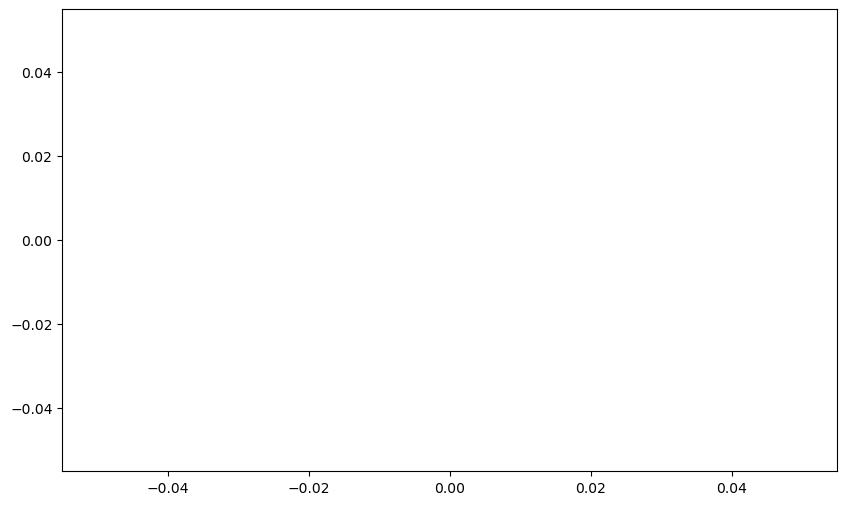

In [120]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot all individual paths
for sim in range(num_sim):
    plt.plot(x_t[sim, :, 0], x_t[sim, :, 1], 'gray', alpha=0.3, linewidth=0.5)

# Plot average path
plt.plot(avg_path[:, 0], avg_path[:, 1], 'red', linewidth=3, label='Average Path')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Drone Paths with {"Velocity" if np.any(Q[2:]) else "Position"} Noise')
plt.legend()
plt.grid(True)
plt.show()


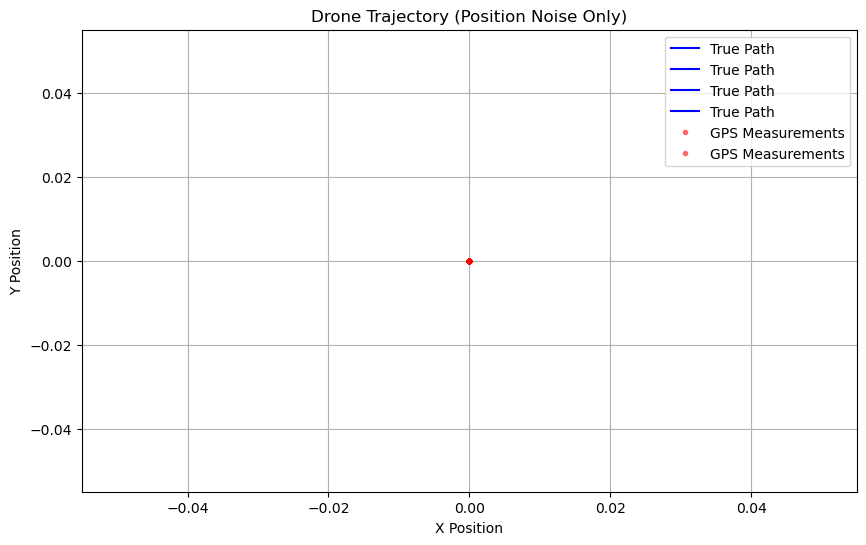

In [108]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_t[:, 0], x_t[:, 1], 'b-', label ='True Path')
plt.plot(measurements[:, 0], measurements[:, 1], 'r.', alpha=0.5, label='GPS Measurements')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Drone Trajectory ({"Velocity" if Q[2,2] > 0 else "Position"} Noise Only)')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# Simulation
np.random.seed(42)  # For reproducibility
x_t = []
measurements = []
Q = Q_vel

for t in range(T):
    # Save current true state
    x_t.append(x_0.copy())
    
    # Simulate measurement (GPS)
    r = np.random.multivariate_normal([0, 0], R)
    y_t = H @ x_0 + r
    measurements.append(y_t)
    
    # Simulate next state (with process noise)
    q = np.random.multivariate_normal([0, 0, 0, 0], Q)
    x_0 = A @ x_0 + q

# Convert to arrays for plotting
x_t = np.array(x_t)
measurements = np.array(measurements)

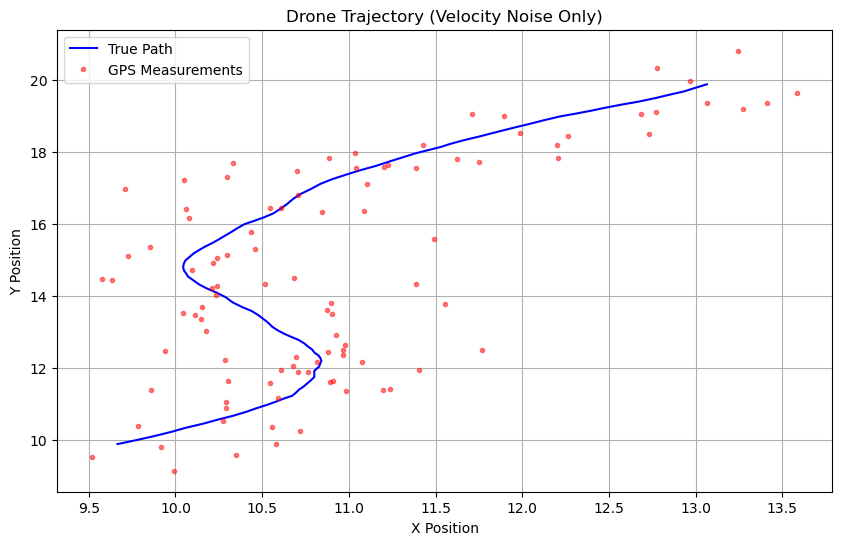

In [78]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_t[:, 0], x_t[:, 1], 'b-', label ='True Path')
plt.plot(measurements[:, 0], measurements[:, 1], 'r.', alpha=0.5, label='GPS Measurements')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Drone Trajectory ({"Velocity" if Q[2,2] > 0 else "Position"} Noise Only)')
plt.legend()
plt.grid(True)
plt.show()

# mehrere Kurve